# Deep Learning & Art: Neural Style Transfer

Welcome to the Week 4 assignment! In this lab assignment, you will learn about Neural Style Transfer, an algorithm created by [Gatys et al. (2015).](https://arxiv.org/abs/1508.06576)

**Upon completion of this assignment, you will be able to:**
- Implement the neural style transfer algorithm 
- Generate novel artistic images using your algorithm 
- Define the style cost function for Neural Style Transfer
- Define the content cost function for Neural Style Transfer

Most of the algorithms you've studied optimize a cost function to get a set of parameter values. With Neural Style Transfer, you'll get to optimize a cost function to get pixel values. Exciting!

## Important Note on Submission to the AutoGrader

Before submitting your assignment to the AutoGrader, please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

If you do any of the following, you will get something like, `Grader not found` (or similarly unexpected) error upon submitting your assignment. Before asking for help/debugging the errors in your assignment, check for these first. If this is the case, and you don't remember the changes you have made, you can get a fresh copy of the assignment by following these [instructions](https://www.coursera.org/learn/convolutional-neural-networks/supplement/DS4yP/h-ow-to-refresh-your-workspace).

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
# Aprendizaje profundo y arte: Transferencia de estilos neuronales

¡Bienvenidos a la tarea de la semana 4! En esta tarea de laboratorio, aprenderás sobre la Transferencia de Estilo Neural, un algoritmo creado por [Gatys et al. (2015).](https://arxiv.org/abs/1508.06576)

**Al completar esta tarea, serás capaz de
- Implementar el algoritmo de transferencia de estilo neural 
- Generar imágenes artísticas novedosas utilizando su algoritmo 
- Definir la función de coste de estilo para la Transferencia Neural de Estilo
- Definir la función de coste de contenido para la Transferencia Neural de Estilo

La mayoría de los algoritmos que has estudiado optimizan una función de coste para obtener un conjunto de valores de parámetros. Con Neural Style Transfer, conseguirás optimizar una función de coste para obtener valores de píxeles. Es emocionante.

## Nota importante sobre el envío al AutoGrader

Antes de enviar su tarea al AutoGrader, por favor asegúrese de que no está haciendo lo siguiente:

1. 1. No ha añadido ninguna declaración _extra_ `print` en la tarea.
2. 2. No ha añadido ninguna celda de código _extra_ en la tarea.
3. No ha cambiado ningún parámetro de la función.
4. No ha utilizado ninguna variable global dentro de sus ejercicios calificados. A menos que se le indique específicamente que lo haga, por favor absténgase de hacerlo y utilice las variables locales en su lugar.
5. 5. No está cambiando el código de asignación donde no es necesario, como la creación de variables _extra_.

Si hace algo de lo siguiente, obtendrá un error como `Grader no encontrado` (o similarmente inesperado) al enviar su tarea. Antes de pedir ayuda/depurar los errores de su tarea, compruebe esto primero. Si este es el caso, y no recuerda los cambios que ha realizado, puede obtener una nueva copia de la tarea siguiendo estas [instrucciones](https://www.coursera.org/learn/convolutional-neural-networks/supplement/DS4yP/h-ow-to-refresh-your-workspace).


## Table of Contents

- [1 - Packages](#1)
- [2 - Problem Statement](#2)
- [3 - Transfer Learning](#3)
- [4 - Neural Style Transfer (NST)](#4)
    - [4.1 - Computing the Content Cost](#4-1)
        - [4.1.1 - Make Generated Image G Match the Content of Image C](#4-1-1)
        - [4.1.2 - Content Cost Function  𝐽𝑐𝑜𝑛𝑡𝑒𝑛𝑡(𝐶,𝐺)](#4-1-2)
            - [Excercise 1 - compute_content_cost](#ex-1)
    - [4.2 - Computing the Style Cost](#4-2)
        - [4.2.1 - Style Matrix](#4-2-1)
            - [Exercise 2 - gram_matrix](#ex-2)
        - [4.2.2 - Style Cost](#4-2-2)
            - [Exercise 3 - compute_layer_style_cost](#ex-3)
        - [4.2.3 Style Weights](#4-2-3)
            - [Exercise 4 - compute_style_cost](#ex-4)
    - [4.3 - Defining the Total Cost to Optimize](#4-3)
        - [Exercise 5 - total_cost](#ex-5)
- [5 - Solving the Optimization Problem](#5)
    - [5.1 Load the Content Image](#5-1)
    - [5.2 Load the Style Image](#5-2)
    - [5.3 Randomly Initialize the Image to be Generated](#5-3)
    - [5.4 - Load Pre-trained VGG19 Model](#5-4)
    - [5.5 - Compute Total Cost](#5-5)
        - [5.5.1 - Compute Content Cost](#5-5-1)
        - [5.5.2 - Compute Style Cost](#5-5-2)
            - [Exercise 6 - train_step](#ex-6)
    - [5.6 - Train the Model](#5-6)
- [6 - Test With Your Own Image (Optional/Ungraded)](#6)
- [7 - References](#7)




<a name='1'></a>
## 1 - Packages

Run the following code cell to import the necessary packages and dependencies you will need to perform Neural Style Transfer.

In [68]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.python.framework.ops import EagerTensor
import pprint
%matplotlib inline

<a name='2'></a>
## 2 - Problem Statement

Neural Style Transfer (NST) is one of the most fun and interesting optimization techniques in deep learning. It merges two images, namely: a <strong>"content" image (C)</strong> and a <strong>"style" image (S)</strong>, to create a <strong>"generated" image (G)</strong>. The generated image G combines the "content" of the image C with the "style" of image S. 

In this assignment, you are going to combine the Louvre museum in Paris (content image C) with the impressionist style of Claude Monet (content image S) to generate the following image:

<img src="images/louvre_generated.png" style="width:750px;height:200px;">

Let's get started!

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

La transferencia de estilo neuronal (NST) es una de las técnicas de optimización más divertidas e interesantes del aprendizaje profundo. Fusiona dos imágenes, a saber: una imagen de **"contenido" (C)** y una **"imagen de estilo" (S)**, para crear una imagen **"generada" (G)**. La imagen generada G combina el contenido de la imagen C con el estilo de la imagen S.

En esta tarea, vas a combinar el museo del Louvre de París (imagen de contenido C) con el estilo impresionista de Claude Monet (imagen de contenido S) para generar la siguiente imagen:
    
<img src="images/louvre_generated.png" style="width:750px;height:200px;">


<a name='3'></a>
## 3 - Transfer Learning


Neural Style Transfer (NST) uses a previously trained convolutional network, and builds on top of that. The idea of using a network trained on a different task and applying it to a new task is called transfer learning. 

You will be using the the epynomously named VGG network from the [original NST paper](https://arxiv.org/abs/1508.06576) published by the Visual Geometry Group at University of Oxford in 2014. Specifically, you'll use VGG-19, a 19-layer version of the VGG network. This model has already been trained on the very large ImageNet database, and has learned to recognize a variety of low level features (at the shallower layers) and high level features (at the deeper layers). 

Run the following code to load parameters from the VGG model. This may take a few seconds. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
La transferencia de estilo neuronal (NST) utiliza una red convolucional previamente entrenada y se basa en ella. La idea de utilizar una red entrenada en una tarea diferente y aplicarla a una nueva tarea se llama aprendizaje de transferencia. 

Utilizarás la red llamada VGG del [documento original de NST](https://arxiv.org/abs/1508.06576) publicado por el Grupo de Geometría Visual de la Universidad de Oxford en 2014. En concreto, utilizará VGG-19, una versión de 19 capas de la red VGG. Este modelo ya ha sido entrenado en la amplísima base de datos ImageNet, y ha aprendido a reconocer una variedad de características de bajo nivel (en las capas menos profundas) y de alto nivel (en las capas más profundas). 

Ejecute el siguiente código para cargar los parámetros del modelo VGG. Esto puede tardar unos segundos. 

In [69]:
tf.random.set_seed(272) # DO NOT CHANGE THIS VALUE
pp = pprint.PrettyPrinter(indent=4)
img_size = 400
vgg = tf.keras.applications.VGG19(include_top=False,
                                  input_shape=(img_size, img_size, 3),
                                  weights='pretrained-model/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')

vgg.trainable = False
pp.pprint(vgg)

<a name='4'></a>
## 4 - Neural Style Transfer (NST)

Next, you will be building the Neural Style Transfer (NST) algorithm in three steps:

- First, you will build the content cost function $J_{content}(C,G)$
- Second, you will build the style cost function $J_{style}(S,G)$
- Finally, you'll put it all together to get $J(G) = \alpha J_{content}(C,G) + \beta J_{style}(S,G)$. Exciting!

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

A continuación, construirás el algoritmo de Transferencia Neural de Estilo (NST) en tres pasos:

- En primer lugar, construirá la función de coste de contenido $J_{content}(C,G)$
- En segundo lugar, construirás la función de coste de estilo $J_{style}(S,G)$
- Por último, lo pondrás todo junto para obtener $J(G) = \alpha J_{content}(C,G) + \beta J_{style}(S,G)$. ¡Emocionante!
</details>
<a name='4-1'></a>

### 4.1 - Computing the Content Cost

<a name='4-1-1'></a>
#### 4.1.1 - Make Generated Image G Match the Content of Image C

One goal you should aim for when performing NST is for the content in generated image G to match the content of image C. To do so, you'll need an understanding of <b> shallow versus deep layers </b>:

* The shallower layers of a ConvNet tend to detect lower-level features such as <i>edges and simple textures</i>.
* The deeper layers tend to detect higher-level features such as more <i> complex textures and object classes</i>. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Uno de los objetivos que debes perseguir al realizar el NST es que el contenido de la imagen generada G coincida con el contenido de la imagen C. Para ello, necesitarás conocer las <b>capas superficiales frente a las profundas</b>.
    
* Las capas más superficiales de una ConvNet tienden a detectar características de nivel inferior como _bordes y texturas simples_.
+ Las capas más profundas tienden a detectar características de mayor nivel, como _texturas y clases de objetos más complejas_.

</details>    
    
#### To choose a "middle" activation layer $a^{[l]}$ :
You need the "generated" image G to have similar content as the input image C. Suppose you have chosen some layer's activations to represent the content of an image.

* In practice, you'll get the most visually pleasing results if you choose a layer in the <b>middle</b> of the network--neither too shallow nor too deep. This ensures that the network detects both higher-level and lower-level features.
* After you have finished this exercise, feel free to come back and experiment with using different layers to see how the results vary!

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Elegir una capa de activación "media" $a^{[l]}$ :  
    
Necesita que la imagen "generada" G tenga un contenido similar al de la imagen de entrada C. Suponga que ha elegido algunas activaciones de la capa para representar el contenido de una imagen.
   
    
* En la práctica, obtendrá los resultados más agradables visualmente si elige una capa en el <b>medio</b> de la red, ni demasiado superficial ni demasiado profunda. Esto garantiza que la red detecte tanto las características de nivel superior como las de nivel inferior.
* Una vez que hayas terminado este ejercicio, no dudes en volver y experimentar con diferentes capas para ver cómo varían los resultados.

</details>

#### To forward propagate image "C:"
* Set the image C as the input to the pretrained VGG network, and run forward propagation.  
* Let $a^{(C)}$ be the hidden layer activations in the layer you had chosen. (In lecture, this was written as $a^{[l](C)}$, but here the superscript $[l]$ is dropped to simplify the notation.) This will be an $n_H \times n_W \times n_C$ tensor.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Para propagar hacia adelante la imagen "C":"
* Establece la imagen C como entrada a la red VGG preentrenada, y ejecuta la propagación hacia delante.  
* Deja que $a^{(C)}$ sean las activaciones de la capa oculta en la capa que has elegido. (En la clase, esto se escribió como $a^{[l](C)}$, pero aquí el superíndice $[l]$ se elimina para simplificar la notación). Esto será un tensor de $n_H \times n_W \times n_C$ tensor.
    
</details>

#### To forward propagate image "G":
* Repeat this process with the image G: Set G as the input, and run forward progation. 
* Let $a^{(G)}$ be the corresponding hidden layer activation. 

In this running example, the content image C will be the picture of the Louvre Museum in Paris. Run the code below to see a picture of the Louvre.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Para propagar hacia adelante la imagen "G":
* Repetir este proceso con la imagen G: Establecer G como la entrada, y ejecutar la progación hacia adelante. 
* Sea $a^{(G)}$ la activación de la capa oculta correspondiente. 

En este ejemplo de ejecución, la imagen de contenido C será la foto del Museo del Louvre en París. Ejecute el código siguiente para ver una imagen del Louvre.

The content image (C) shows the Louvre museum's pyramid surrounded by old Paris buildings, against a sunny sky with a few clouds.


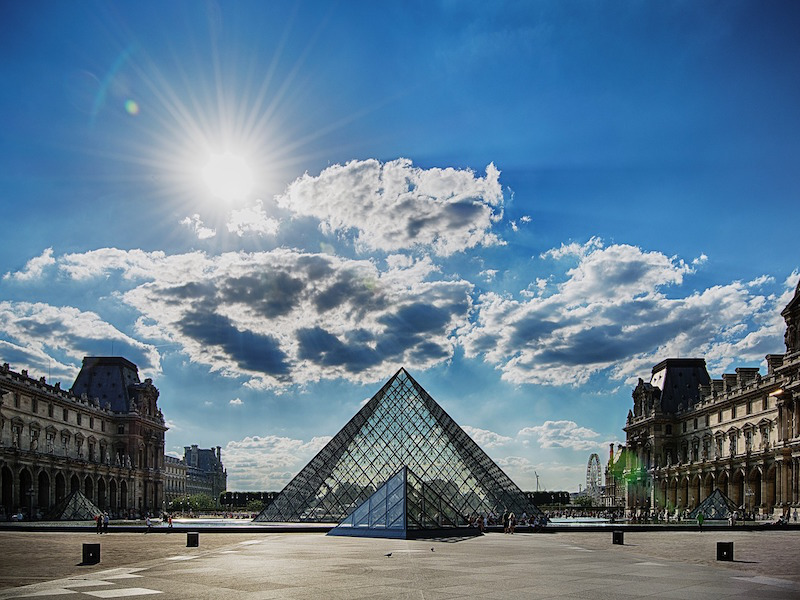

In [13]:
content_image = Image.open("images/louvre.jpg")
print("The content image (C) shows the Louvre museum's pyramid surrounded by old Paris buildings, against a sunny sky with a few clouds.")
content_image

<a name='4-1-2'></a>
#### 4.1.2 - Content Cost Function $J_{content}(C,G)$
One goal you should aim for when performing NST is for the content in generated image G to match the content of image C. A method to achieve this is to calculate the content cost function, which will be defined as:

$$J_{content}(C,G) =  \frac{1}{4 \times n_H \times n_W \times n_C}\sum _{ \text{all entries}} (a^{(C)} - a^{(G)})^2\tag{1} $$

* Here, $n_H, n_W$ and $n_C$ are the height, width and number of channels of the hidden layer you have chosen, and appear in a normalization term in the cost. 
* For clarity, note that $a^{(C)}$ and $a^{(G)}$ are the 3D volumes corresponding to a hidden layer's activations. 
* In order to compute the cost $J_{content}(C,G)$, it might also be convenient to unroll these 3D volumes into a 2D matrix, as shown below.
* Technically this unrolling step isn't needed to compute $J_{content}$, but it will be good practice for when you do need to carry out a similar operation later for computing the style cost $J_{style}$.

<img src="images/NST_LOSS.png" style="width:800px;height:400px;">

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

#### 4.1.2 - Función de coste del contenido $J_{content}(C,G)$
Uno de los objetivos que debe perseguirse al realizar NST es que el contenido de la imagen generada G coincida con el contenido de la imagen C. Un método para conseguirlo es calcular la función de coste del contenido, que se definirá como

$$J_{content}(C,G) =  \frac{1}{4 \times n_H \times n_W \times n_C}\sum _{ \text{all entries}} (a^{(C)} - a^{(G)})^2\tag{1} $$

* Aquí, $n_H, n_W$ y $n_C$ son la altura, la anchura y el número de canales de la capa oculta que se ha elegido, y aparecen en un término de normalización en el coste. 
* Para mayor claridad, nótese que $a^{(C)}$ y $a^{(G)}$ son los volúmenes 3D correspondientes a las activaciones de una capa oculta. 
* Para calcular el coste $J_{content}(C,G)$, también puede ser conveniente desenrollar estos volúmenes 3D en una matriz 2D, como se muestra a continuación.
* Técnicamente, este paso de desenrollar no es necesario para calcular $J_{content}$, pero será una buena práctica para cuando usted necesita para llevar a cabo una operación similar más tarde para calcular el costo de estilo $J_{style}$.
    
<img src="images/NST_LOSS.png" style="width:800px;height:400px;">


<a name='ex-1'></a>
### Excercise 1 - compute_content_cost

Compute the "content cost" using TensorFlow. 

**Instructions**: 

`a_G`: hidden layer activations representing content of the image G
<br>
`a_C`: hidden layer activations representing content of the image C 

The 3 steps to implement this function are:
1. Retrieve dimensions from `a_G`: 
- To retrieve dimensions from a tensor `X`, use: `X.get_shape().as_list()`  
    
2. Unroll `a_C` and `a_G` as explained in the picture above
- You'll likely want to use these functions: [tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose) and [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape).  
    
3. Compute the content cost:
- You'll likely want to use these functions: [tf.reduce_sum](https://www.tensorflow.org/api_docs/python/tf/reduce_sum), [tf.square](https://www.tensorflow.org/api_docs/python/tf/square) and [tf.subtract](https://www.tensorflow.org/api_docs/python/tf/subtract).
    
    
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

    
Calcular el "coste del contenido" con TensorFlow

Instrucciones :

a_G : activación de la capa oculta que representa el contenido de la imagen G
a_C : activación de la capa oculta que representa el contenido de la imagen C

Los 3 pasos para implementar esta función son

1. Recuperar las dimensiones de `a_G`: 
- Para recuperar las dimensiones de un tensor `X`, utilice: `X.get_shape().as_list()`

2. Desenrolla `a_C` y `a_G` como se explica en la imagen anterior
- Es probable que quieras usar estas funciones: [tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose) and [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape).  

3. Calcula el costo de contenido:
- Es probable que quieras usar estas funciones: [tf.reduce_sum](https://www.tensorflow.org/api_docs/python/tf/reduce_sum), [tf.square](https://www.tensorflow.org/api_docs/python/tf/square) and [tf.subtract](https://www.tensorflow.org/api_docs/python/tf/subtract).

</details>
    

#### Additional Hints for "Unrolling"
* To unroll the tensor, you want the shape to change from $(m,n_H,n_W,n_C)$ to $(m, n_H \times n_W, n_C)$.
* `tf.reshape(tensor, shape)` takes a list of integers that represent the desired output shape.
* For the `shape` parameter, a `-1` tells the function to choose the correct dimension size so that the output tensor still contains all the values of the original tensor.
* So `tf.reshape(a_C, shape=[m, n_H * n_W, n_C])` gives the same result as `tf.reshape(a_C, shape=[m, -1, n_C])`.
* If you prefer to re-order the dimensions, you can use `tf.transpose(tensor, perm)`, where `perm` is a list of integers containing the original index of the dimensions. 
* For example, `tf.transpose(a_C, perm=[0,3,1,2])` changes the dimensions from $(m, n_H, n_W, n_C)$ to $(m, n_C, n_H, n_W)$.
<!-- * There is more than one way you can unroll a tensor.  -->
* Again, note that you don't necessarily need `tf.transpose` to 'unroll' the tensors in this case but this is a useful function to practice and understand for other situations that you'll encounter.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Consejos adicionales para "Desenrollar"
* Para desenrollar el tensor, quieres que la forma cambie de $(m,n_H,n_W,n_C)$ a $(m, n_H \times n_W, n_C)$.
* `tf.reshape(tensor, shape)` toma una lista de enteros que representan la forma de salida deseada.
* Para el parámetro `shape`, un `-1` le dice a la función que elija el tamaño de dimensión correcto para que el tensor de salida siga conteniendo todos los valores del tensor original.
* Así, `tf.reshape(a_C, shape=[m, n_H * n_W, n_C])` da el mismo resultado que `tf.reshape(a_C, shape=[m, -1, n_C])`.
* Si prefiere reordenar las dimensiones, puede utilizar `tf.transpose(tensor, perm)`, donde `perm` es una lista de enteros que contiene el índice original de las dimensiones. 
* Por ejemplo, `tf.transpose(a_C, perm=[0,3,1,2])` cambia las dimensiones de $(m, n_H, n_W, n_C)$ a $(m, n_C, n_H, n_W)$.
<!-- * Hay más de una forma de desenrollar un tensor.  -->
* De nuevo, ten en cuenta que no necesitas necesariamente `tf.transpose` para 'desenrollar' los tensores en este caso, pero es una función útil para practicar y entender para otras situaciones que te encontrarás.
    
</details>

<details><summary><font size="1" color="green"><b>codigo</b></font></summary>

```python
_, n_H, n_W, n_C = a_G.get_shape().as_list()
        
a_C_unrolled = tf.transpose(tf.reshape(a_C, shape=[1, n_H * n_W, n_C]), perm=[0,2,1])
a_G_unrolled = tf.transpose(tf.reshape(a_G, shape=[1, n_H * n_W, n_C]), perm=[0,2,1])
    
J_content =  tf.reduce_sum(tf.square(tf.subtract(a_C_unrolled, a_G_unrolled)))/(4*n_H*n_W*n_C)
```

In [74]:
# UNQ_C1
# GRADED FUNCTION: compute_content_cost

def compute_content_cost(content_output, generated_output):
    """
    Computes the content cost
    
    Arguments:
    a_C -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing content of the image C 
    a_G -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing content of the image G
    
    Returns: 
    J_content -- scalar that you compute using equation 1 above.
    """
    a_C = content_output[-1]
    a_G = generated_output[-1]
    
    ### START CODE HERE
    
    # Retrieve dimensions from a_G (≈1 line)
    _, n_H, n_W, n_C = None     
    # Reshape a_C and a_G (≈2 lines)
    a_C_unrolled = None  
    a_G_unrolled = None 
    
    # compute the cost with tensorflow (≈1 line)
    J_content = None
    
    ### END CODE HERE
    
    return J_content

In [73]:
tf.random.set_seed(1)
a_C = tf.random.normal([1, 1, 4, 4, 3], mean=1, stddev=4)
a_G = tf.random.normal([1, 1, 4, 4, 3], mean=1, stddev=4)
J_content = compute_content_cost(a_C, a_G)
J_content_0 = compute_content_cost(a_C, a_C)
assert type(J_content) == EagerTensor, "Use the tensorflow function"
assert np.isclose(J_content_0, 0.0), "Wrong value. compute_content_cost(A, A) must be 0"
assert np.isclose(J_content, 7.0568767), f"Wrong value. Expected {7.0568767},  current{J_content}"

print("J_content = " + str(J_content))

# Test that it works with symbolic tensors
ll = tf.keras.layers.Dense(8, activation='relu', input_shape=(1, 4, 4, 3))
model_tmp = tf.keras.models.Sequential()
model_tmp.add(ll)
try:
    compute_content_cost(ll.output, ll.output)
    print("\033[92mAll tests passed")
except Exception as inst:
    print("\n\033[91mDon't use the numpy API inside compute_content_cost\n")
    print(inst)

J_content = tf.Tensor(7.056877, shape=(), dtype=float32)
All tests passed


**Expected Output**:

<table>
    <tr>
        <td>
            <b>J_content</b>  
        </td>
        <td>
            7.0568767
        </td>
    </tr>

</table>


Congrats! You've now successfully calculated the content cost function!

<br>
<font color = 'blue'>
    
**What you should remember:**
    
- The content cost takes a hidden layer activation of the neural network, and measures how different $a^{(C)}$ and $a^{(G)}$ are. 
- When you minimize the content cost later, this will help make sure $G$ has similar content as $C$. 
        
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
**Lo que debe recordar:**
    
- El coste de contenido toma una activación de la capa oculta de la red neuronal, y mide lo diferentes que son $a^{(C)}$ y $a^{(G)}$. 
- Cuando se minimiza el costo de contenido más tarde, esto ayudará a asegurarse de que $G$ tiene un contenido similar a $C$.


<a name='4-2'></a>
### 4.2 - Computing the Style Cost

For the running example, you will use the following style image: 

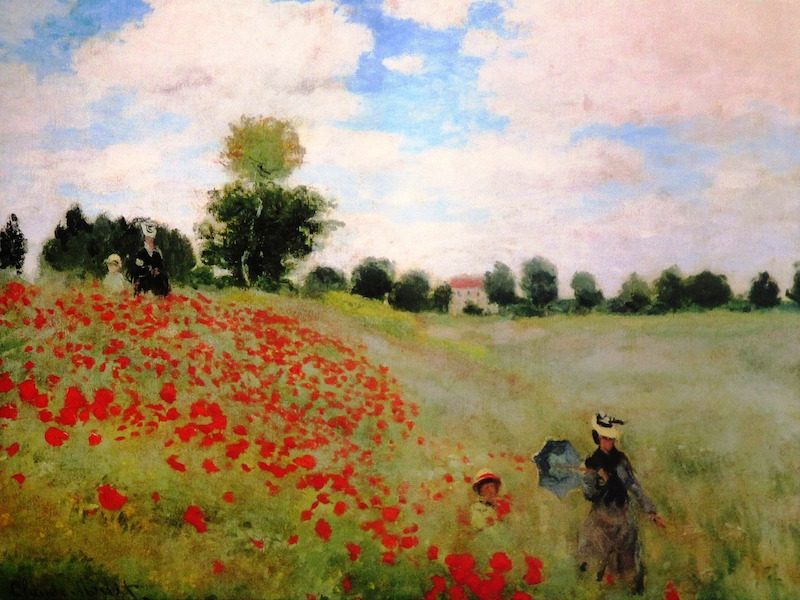

In [10]:
example = Image.open("images/monet_800600.jpg")
example

This was painted in the style of <b>[impressionism](https://en.wikipedia.org/wiki/Impressionism)</b>.

Now let's see how you can now define a "style" cost function $J_{style}(S,G)$!

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


Ahora veamos cómo se puede definir una función de coste de "estilo" $J_{style}(S,G)$.

<a name='4-2-1'></a>
#### 4.2.1 - Style Matrix

#### Gram matrix
* The style matrix is also called a "Gram matrix." 
* In linear algebra, the Gram matrix G of a set of vectors $(v_{1},\dots ,v_{n})$ is the matrix of dot products, whose entries are ${\displaystyle G_{ij} = v_{i}^T v_{j} = np.dot(v_{i}, v_{j})  }$. 
* In other words, $G_{ij}$ compares how similar $v_i$ is to $v_j$: If they are highly similar, you would expect them to have a large dot product, and thus for $G_{ij}$ to be large. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Matriz de Gram
* La matriz de estilo también se llama "matriz de Gram". 
* En álgebra lineal, la matriz de Gram G de un conjunto de vectores $(v_{1},\dots ,v_{n})$ es la matriz de productos de puntos, cuyas entradas son ${\displaystyle G_{ij} = v_{i}^T v_{j} = np.dot(v_{i}, v_{j}) }$. 
* En otras palabras, $G_{ij}$ compara el grado de similitud entre $v_i$ y $v_j$: si son muy similares, se espera que tengan un producto punto grande y, por tanto, que $G_{ij}$ sea grande. 
    
</details>

#### Two meanings of the variable $G$
* Note that there is an unfortunate collision in the variable names used here. Following the common terminology used in the literature: 
    * $G$ is used to denote the Style matrix (or Gram matrix) 
    * $G$ also denotes the generated image. 
* For the sake of clarity, in this assignment $G_{gram}$ will be used to refer to the Gram matrix, and $G$ to denote the generated image.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Dos significados de la variable $G$

* Nótese que hay una desafortunada colisión en los nombres de las variables utilizados aquí. Siguiendo la terminología común utilizada en la literatura: 
    * $G$ se utiliza para denotar la matriz de estilo (o matriz de Gram) 
    * $G$ también denota la imagen generada. 
* En aras de la claridad, en esta asignación $G_{gram}$ se utilizará para referirse a la matriz de Gram, y $G$ para denotar la imagen generada.


#### Compute Gram matrix $G_{gram}$
You will compute the Style matrix by multiplying the "unrolled" filter matrix with its transpose:

<img src="images/NST_GM.png" style="width:900px;height:300px;">

$$\mathbf{G}_{gram} = \mathbf{A}_{unrolled} \mathbf{A}_{unrolled}^T$$

#### $G_{(gram)ij}$: correlation
The result is a matrix of dimension $(n_C,n_C)$ where $n_C$ is the number of filters (channels). The value $G_{(gram)i,j}$ measures how similar the activations of filter $i$ are to the activations of filter $j$. 

#### $G_{(gram),ii}$: prevalence of patterns or textures
* The diagonal elements $G_{(gram)ii}$ measure how "active" a filter $i$ is. 
* For example, suppose filter $i$ is detecting vertical textures in the image. Then $G_{(gram)ii}$ measures how common  vertical textures are in the image as a whole.
* If $G_{(gram)ii}$ is large, this means that the image has a lot of vertical texture. 


By capturing the prevalence of different types of features ($G_{(gram)ii}$), as well as how much different features occur together ($G_{(gram)ij}$), the Style matrix $G_{gram}$ measures the style of an image. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
Calcular la matriz Gram $G_{gram}$  
    
        Calcularás la matriz de estilo multiplicando la matriz de filtro "desenrollada" por su transposición:

<img src="images/NST_GM.png" style="width:900px;height:300px;">

$$\mathbf{G}_{gram} = \mathbf{A}_{unrolled} \mathbf{A}_{unrolled}^T$$
    

$G_{(gram)ij}$: correlación
    
- El resultado es una matriz de dimensión $(n_C,n_C)$ donde $n_C$ es el número de filtros (canales). El valor $G_{(gram)i,j}$ mide la similitud de las activaciones del filtro $i$ con las activaciones del filtro $j$. 
    
$G_{(gram),ii}$: prevalencia de patrones o texturas

* Los elementos diagonales $G_{(gram)ii}$ miden lo "activo" que es un filtro $i$. 
* Por ejemplo, supongamos que el filtro $i$ detecta texturas verticales en la imagen. Entonces $G_{(gram)ii}$ mide la frecuencia de las texturas verticales en la imagen en su conjunto.
* Si $G_{(gram)ii}$ es grande, significa que la imagen tiene mucha textura vertical. 
    
Al capturar la prevalencia de diferentes tipos de características ($G_{(gram)ii}$), así como la cantidad de características diferentes que aparecen juntas ($G_{(gram)ij}$), la matriz de estilo $G_{gram}$ mide el estilo de una imagen. 
    

<a name='ex-2'></a>
### Exercise 2 - gram_matrix
* Using TensorFlow, implement a function that computes the Gram matrix of a matrix A. 
    * The formula is: The gram matrix of A is $G_A = AA^T$. 
* You may want to use these functions: [matmul](https://www.tensorflow.org/api_docs/python/tf/matmul) and [transpose](https://www.tensorflow.org/api_docs/python/tf/transpose).

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


* Usando TensorFlow, implementa una función que calcule la matriz Gram de una matriz A. 
    * La fórmula es: La matriz de Gram de A es $G_A = AA^T$. 
* Puedes usar estas funciones: [matmul](https://www.tensorflow.org/api_docs/python/tf/matmul) y [transpose](https://www.tensorflow.org/api_docs/python/tf/transpose).
 
</details>
<details><summary><font size="1" color="green"><b>codigo</b></font></summary>
tf.linalg.matmul(A,tf.transpose(A))

In [75]:
# UNQ_C2
# GRADED FUNCTION: gram_matrix

def gram_matrix(A):
    """
    Argument:
    A -- matrix of shape (n_C, n_H*n_W)
    
    Returns:
    GA -- Gram matrix of A, of shape (n_C, n_C)
    """  
    ### START CODE HERE
    
    #(≈1 line)
    GA = None
    
    ### END CODE HERE

    return GA

In [76]:
tf.random.set_seed(1)
A = tf.random.normal([3, 2 * 1], mean=1, stddev=4)
GA = gram_matrix(A)

assert type(GA) == EagerTensor, "Use the tensorflow function"
assert GA.shape == (3, 3), "Wrong shape. Check the order of the matmul parameters"
assert np.allclose(GA[0,:], [63.1888, -26.721275, -7.7320204]), "Wrong values."

print("GA = \n" + str(GA))

print("\033[92mAll tests passed")

GA = 
tf.Tensor(
[[ 63.1888    -26.721275   -7.7320204]
 [-26.721275   12.76758    -2.5158243]
 [ -7.7320204  -2.5158243  23.752384 ]], shape=(3, 3), dtype=float32)
All tests passed


**Expected Output**:

<table>
    <tr>
        <td>
            <b>GA</b>
        </td>
        <td>
           [[ 63.1888    -26.721275   -7.7320204] <br>
 [-26.721275   12.76758    -2.5158243] <br>
 [ -7.7320204  -2.5158243  23.752384 ]] <br>
        </td>
    </tr>

</table>

<a name='4-2-2'></a>
#### 4.2.2 - Style Cost

You now know how to calculate the Gram matrix. Congrats! Your next goal will be to minimize the distance between the Gram matrix of the "style" image S and the Gram matrix of the "generated" image G. 
* For now, you will use only a single hidden layer $a^{[l]}$.  
* The corresponding style cost for this layer is defined as: 

$$J_{style}^{[l]}(S,G) = \frac{1}{4 \times {n_C}^2 \times (n_H \times n_W)^2} \sum _{i=1}^{n_C}\sum_{j=1}^{n_C}(G^{(S)}_{(gram)i,j} - G^{(G)}_{(gram)i,j})^2\tag{2} $$

* $G_{gram}^{(S)}$ Gram matrix of the "style" image.
* $G_{gram}^{(G)}$ Gram matrix of the "generated" image.
* Make sure you remember that this cost is computed using the hidden layer activations for a particular hidden layer in the network $a^{[l]}$

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Ahora ya sabes cómo calcular la matriz de Gram. ¡Enhorabuena! Tu próximo objetivo será minimizar la distancia entre la matriz Gram de la imagen "estilo" S y la matriz Gram de la imagen "generada" G.

* Por ahora, se utilizará una sola capa oculta $a^{[l]}$.  
* El coste de estilo correspondiente a esta capa se define como: 

$$J_{style}^{[l]}(S,G) = \frac{1}{4 \times {n_C}^2 \times (n_H \times n_W)^2} \sum _{i=1}^{n_C}\sum_{j=1}^{n_C}(G^{(S)}_{(gram)i,j} - G^{(G)}_{(gram)i,j})^2\tag{2} $$
    
* $G_{gram}^{(S)}$ Matriz de Gram de la imagen "estilo".
* $G_{gram}^{(G)}$ matriz Gram de la imagen "generada".
* Asegúrese de recordar que este costo se calcula utilizando las activaciones de la capa oculta para una capa oculta particular en la red $a^{[l]}$


<a name='ex-3'></a>
### Exercise 3 - compute_layer_style_cost
Compute the style cost for a single layer. 

**Instructions**: The 3 steps to implement this function are:
1. Retrieve dimensions from the hidden layer activations a_G: 
    - To retrieve dimensions from a tensor X, use: `X.get_shape().as_list()`
2. Unroll the hidden layer activations a_S and a_G into 2D matrices, as explained in the picture above (see the images in the sections "computing the content cost" and "style matrix").
    - You may use [tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose) and [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape).
3. Compute the Style matrix of the images S and G. (Use the function you had previously written.) 
4. Compute the Style cost:
    - You may find [tf.reduce_sum](https://www.tensorflow.org/api_docs/python/tf/reduce_sum), [tf.square](https://www.tensorflow.org/api_docs/python/tf/square) and [tf.subtract](https://www.tensorflow.org/api_docs/python/tf/subtract) useful.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
1. Recuperar las dimensiones de las activaciones de la capa oculta a_G: 
    - Para recuperar las dimensiones de un tensor X, utilice: `X.get_shape().as_list()`
2. Desenrolle las activaciones de la capa oculta a_S y a_G en matrices 2D, como se explica en la imagen anterior (vea las imágenes en las secciones "cálculo del coste del contenido" y "matriz de estilo").
    - Puede utilizar [tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose) y [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape).
3. Calcule la matriz de estilo de las imágenes S y G. (Utilice la función que había escrito anteriormente). 
4. 4. Calcule el coste del estilo:
    - Puede ser útil [tf.reduce_suma](https://www.tensorflow.org/api_docs/python/tf/reduce_sum), [tf.square](https://www.tensorflow.org/api_docs/python/tf/square) y [tf.subtract](https://www.tensorflow.org/api_docs/python/tf/subtract).

</details>
    
#### Additional Hints
* Since the activation dimensions are $(m, n_H, n_W, n_C)$ whereas the desired unrolled matrix shape is $(n_C, n_H*n_W)$, the order of the filter dimension $n_C$ is changed.  So `tf.transpose` can be used to change the order of the filter dimension.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

* Como las dimensiones de activación son $(m, n_H, n_W, n_C)$ mientras que la forma deseada de la matriz desenrollada es $(n_C, n_H*n_W)$, el orden de la dimensión del filtro $n_C$ se cambia.  Así que `tf.transpose` se puede utilizar para cambiar el orden de la dimensión del filtro.
 
    
<details><summary><font size="1" color="green"><b>codigo</b></font></summary>

```python
m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
# Reshape the images from (n_H * n_W, n_C) to have them of shape (n_C, n_H * n_W) (≈2 lines)
a_S = tf.reshape(tf.transpose(a_S), shape=[n_C, n_H * n_W])
a_G = tf.reshape(tf.transpose(a_G), shape=[n_C, n_H * n_W])
a_S = tf.transpose(tf.reshape(a_S, shape=[n_H * n_W, n_C]), perm=[1,0])
a_G = tf.transpose(tf.reshape(a_G, shape=[n_H * n_W, n_C]), perm=[1,0])
# Computing gram_matrices for both images S and G (≈2 lines)
GS = gram_matrix(a_S)
GG = gram_matrix(a_G)
# Computing the loss (≈1 line)
J_style_layer = tf.reduce_sum(tf.reduce_sum(tf.square(tf.subtract(GS,GG))))/(4*(n_C**2)*((n_H*n_W)**2))
```
    

In [47]:
# UNQ_C3
# GRADED FUNCTION: compute_layer_style_cost

def compute_layer_style_cost(a_S, a_G):
    """
    Arguments:
    a_S -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing style of the image S 
    a_G -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing style of the image G
    
    Returns: 
    J_style_layer -- tensor representing a scalar value, style cost defined above by equation (2)
    """
    ### START CODE HERE
    
    # Retrieve dimensions from a_G (≈1 line)
    _, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    # Reshape the images from (n_H * n_W, n_C) to have them of shape (n_C, n_H * n_W) (≈2 lines)
    a_S = None
    a_G = None

    # Computing gram_matrices for both images S and G (≈2 lines)
    GS = None
    GG = None

    # Computing the loss (≈1 line)
    J_style_layer = None
    
    ### END CODE HERE
    return J_style_layer


In [48]:
tf.random.set_seed(1)
a_S = tf.random.normal([1, 4, 4, 3], mean=1, stddev=4)
a_G = tf.random.normal([1, 4, 4, 3], mean=1, stddev=4)
J_style_layer_GG = compute_layer_style_cost(a_G, a_G)
J_style_layer_SG = compute_layer_style_cost(a_S, a_G)


assert type(J_style_layer_GG) == EagerTensor, "Use the tensorflow functions"
assert np.isclose(J_style_layer_GG, 0.0), "Wrong value. compute_layer_style_cost(A, A) must be 0"
assert J_style_layer_SG > 0, "Wrong value. compute_layer_style_cost(A, B) must be greater than 0 if A != B"
assert np.isclose(J_style_layer_SG, 14.017805), "Wrong value."

print("J_style_layer = " + str(J_style_layer_SG))




J_style_layer = tf.Tensor(14.017805, shape=(), dtype=float32)


**Expected Output**:

<table>
    <tr>
        <td>
            <b>J_style_layer</b>
        </td>
        <td>
           14.017805
        </td>
    </tr>

</table>

<a name='4-2-3'></a>
#### 4.2.3 Style Weights

* So far you have captured the style from only one layer. 
* You'll get better results if you "merge" style costs from several different layers. 
* Each layer will be given weights ($\lambda^{[l]}$) that reflect how much each layer will contribute to the style.
* After completing this exercise, feel free to come back and experiment with different weights to see how it changes the generated image $G$.
* By default, give each layer equal weight, and the weights add up to 1.  ($\sum_{l}^L\lambda^{[l]} = 1$)

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

* Hasta ahora ha capturado el estilo de una sola capa. 
* Obtendrá mejores resultados si "fusiona" los costes de estilo de varias capas diferentes. 
* A cada capa se le darán pesos ($\lambda^{[l]}$) que reflejen cuánto contribuirá cada capa al estilo.
* Después de completar este ejercicio, no dude en volver y experimentar con diferentes pesos para ver cómo cambia la imagen generada $G$.
* Por defecto, dar a cada capa el mismo peso, y los pesos se suman a 1. ($\sum_{l}^L\lambda^{[l]} = 1$)

Start by listing the layer names:
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
Empiece por enumerar los nombres de las capas:

In [49]:
for layer in vgg.layers:
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


Get a look at the output of a layer `block5_conv4`. You will later define this as the content layer, which will represent the image.
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Vea la salida de la capa `block5_conv4`. Más tarde se definirá como la capa de contenido, que representará la imagen.

In [50]:
vgg.get_layer('block5_conv4').output

<tf.Tensor 'block5_conv4/Relu_1:0' shape=(None, 25, 25, 512) dtype=float32>

Now choose layers to represent the style of the image and assign style costs:

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


Ahora elija las capas para representar el estilo de la imagen y asigne los costes de estilo:

In [51]:
STYLE_LAYERS = [
    ('block1_conv1', 0.2),
    ('block2_conv1', 0.2),
    ('block3_conv1', 0.2),
    ('block4_conv1', 0.2),
    ('block5_conv1', 0.2)]

You can combine the style costs for different layers as follows:

$$J_{style}(S,G) = \sum_{l} \lambda^{[l]} J^{[l]}_{style}(S,G)$$

where the values for $\lambda^{[l]}$ are given in `STYLE_LAYERS`. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
  
Puede combinar los costes de estilo para diferentes capas de la siguiente manera:

$$J_{style}(S,G) = \sum_{l} \lambda^{[l]} J^{[l]}_{style}(S,G)$$  

donde los valores de $\lambda^{[l]}$ están dadas en `STYLE_LAYERS`.

<a name='ex-4'></a>
### Exercise 4 -  compute_style_cost
Compute style cost

<b> Instructions: </b>
* A compute_style_cost(...) function has already been implemented. 
* It calls your `compute_layer_style_cost(...)` several times, and weights their results using the values in `STYLE_LAYERS`. 
* Please read over it to make sure you understand what it's doing.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Instrucciones :

* Ya se ha implementado una función compute_style_cost(...). 
* Llama a su `compute_layer_style_cost(...)` varias veces, y pondera sus resultados usando los valores en `STYLE_LAYERS`. 
* Por favor, léalo para asegurarse de que entiende lo que está haciendo.

</details>
    
    
#### Description of `compute_style_cost`
For each layer:
* Select the activation (the output tensor) of the current layer.
* Get the style of the style image "S" from the current layer.
* Get the style of the generated image "G" from the current layer.
* Compute the "style cost" for the current layer
* Add the weighted style cost to the overall style cost (J_style)

Once you're done with the loop:  
* Return the overall style cost.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Para cada capa:
* Seleccionar la activación (el tensor de salida) de la capa actual.
* Obtener el estilo de la imagen de estilo "S" de la capa actual.
* Obtener el estilo de la imagen generada "G" de la capa actual.
* Calcular el "coste de estilo" de la capa actual.
* Añadir el coste de estilo ponderado al coste de estilo global (J_style)

Una vez terminado el bucle:  
* Devuelve el coste global del estilo.
 

In [52]:
def compute_style_cost(style_image_output, generated_image_output, STYLE_LAYERS=STYLE_LAYERS):
    """
    Computes the overall style cost from several chosen layers
    
    Arguments:
    style_image_output -- our tensorflow model
    generated_image_output --
    STYLE_LAYERS -- A python list containing:
                        - the names of the layers we would like to extract style from
                        - a coefficient for each of them
    
    Returns: 
    J_style -- tensor representing a scalar value, style cost defined above by equation (2)
    """
    
    # initialize the overall style cost
    J_style = 0

    # Set a_S to be the hidden layer activation from the layer we have selected.
    # The last element of the array contains the content layer image, which must not be used.
    a_S = style_image_output[:-1]

    # Set a_G to be the output of the choosen hidden layers.
    # The last element of the list contains the content layer image which must not be used.
    a_G = generated_image_output[:-1]
    for i, weight in zip(range(len(a_S)), STYLE_LAYERS):  
        # Compute style_cost for the current layer
        J_style_layer = compute_layer_style_cost(a_S[i], a_G[i])

        # Add weight * J_style_layer of this layer to overall style cost
        J_style += weight[1] * J_style_layer

    return J_style

How do you choose the coefficients for each layer? The deeper layers capture higher-level concepts, and the features in the deeper layers are less localized in the image relative to each other. So if you want the generated image to softly follow the style image, try choosing larger weights for deeper layers and smaller weights for the first layers. In contrast, if you want the generated image to strongly follow the style image, try choosing smaller weights for deeper layers and larger weights for the first layers.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


¿Cómo se eligen los coeficientes de cada capa? Las capas más profundas capturan conceptos de mayor nivel, y las características de las capas más profundas están menos localizadas en la imagen en relación con las demás. Por lo tanto, si quiere que la imagen generada siga suavemente la imagen de estilo, intente elegir pesos mayores para las capas más profundas y pesos menores para las primeras capas. Por el contrario, si quiere que la imagen generada siga fuertemente la imagen de estilo, intente elegir pesos más pequeños para las capas más profundas y pesos más grandes para las primeras capas.

</details>
    
<br>
<font color = 'blue'>
    
**What you should remember:**
    
- The style of an image can be represented using the Gram matrix of a hidden layer's activations. 
- You get even better results by combining this representation from multiple different layers. 
- This is in contrast to the content representation, where usually using just a single hidden layer is sufficient.
- Minimizing the style cost will cause the image $G$ to follow the style of the image $S$. 
   
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

**Lo que debes recordar:**
    
- El estilo de una imagen puede representarse mediante la matriz Gram de las activaciones de una capa oculta. 
- Se obtienen mejores resultados si se combina esta representación de varias capas diferentes. 
- Esto contrasta con la representación del contenido, en la que suele ser suficiente utilizar una sola capa oculta.
- Minimizar el coste de estilo hará que la imagen $G$ siga el estilo de la imagen $S$.


<a name='4-3'></a>
### 4.3 - Defining the Total Cost to Optimize

Finally, you will create a cost function that minimizes both the style and the content cost. The formula is: 

$$J(G) = \alpha J_{content}(C,G) + \beta J_{style}(S,G)$$

<a name='ex-5'></a>
### Exercise 5 - total_cost

Implement the total cost function which includes both the content cost and the style cost. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Por último, creará una función de coste que minimice tanto el coste de estilo como el de contenido. La fórmula es: 

$$J(G) = \alpha J_{content}(C,G) + \beta J_{style}(S,G)$$

Implementar la función de coste total que incluye tanto el coste de contenido como el coste de estilo. 
    
</details>
    
<details><summary><font size="1" color="green"><b>codigo</b></font></summary>

```python
J = alpha * J_content + beta * J_style
```   

In [53]:
# UNQ_C4
# GRADED FUNCTION: total_cost
@tf.function()
def total_cost(J_content, J_style, alpha = 10, beta = 40):
    """
    Computes the total cost function
    
    Arguments:
    J_content -- content cost coded above
    J_style -- style cost coded above
    alpha -- hyperparameter weighting the importance of the content cost
    beta -- hyperparameter weighting the importance of the style cost
    
    Returns:
    J -- total cost as defined by the formula above.
    """
    ### START CODE HERE
    
    #(≈1 line)
    J = None
    
    ### START CODE HERE

    return J

In [54]:
J_content = 0.2    
J_style = 0.8
J = total_cost(J_content, J_style)

assert type(J) == EagerTensor, "Do not remove the @tf.function() modifier from the function"
assert J == 34, "Wrong value. Try inverting the order of alpha and beta in the J calculation"
assert np.isclose(total_cost(0.3, 0.5, 3, 8), 4.9), "Wrong value. Use the alpha and beta parameters"

np.random.seed(1)
print("J = " + str(total_cost(np.random.uniform(0, 1), np.random.uniform(0, 1))))

print("\033[92mAll tests passed")

J = tf.Tensor(32.9832, shape=(), dtype=float32)
All tests passed


**Expected Output**:

<table>
    <tr>
        <td>
            <b>J</b>
        </td>
        <td>
           32.9832
        </td>
    </tr>

</table>

<font color = 'blue'>
    
**What you should remember:**
- The total cost is a linear combination of the content cost $J_{content}(C,G)$ and the style cost $J_{style}(S,G)$.
- $\alpha$ and $\beta$ are hyperparameters that control the relative weighting between content and style.
 
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

    
**Lo que debe recordar:**
- El coste total es una combinación lineal del coste del contenido $J_{content}(C,G)$ y del coste del estilo $J_{style}(S,G)$.
- $\alpha$ y $\beta$ son hiperparámetros que controlan la ponderación relativa entre el contenido y el estilo.

<a name='5'></a>
## 5 - Solving the Optimization Problem

Finally, you get to put everything together to implement Neural Style Transfer!


Here's what your program be able to do:

1. Load the content image 
2. Load the style image
3. Randomly initialize the image to be generated 
4. Load the VGG19 model
5. Compute the content cost
6. Compute the style cost
7. Compute the total cost
8. Define the optimizer and learning rate

Here are the individual steps in detail.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


Finalmente, ¡puedes reunir todo para implementar la Transferencia de Estilo Neural!


Esto es lo que su programa será capaz de hacer:

1. Cargar la imagen de contenido 
2. Cargar la imagen de estilo
3. Inicializar aleatoriamente la imagen que se va a generar 
4. Cargar el modelo VGG19
5. Calcular el coste del contenido
6. Calcular el coste de estilo
7. Calcular el coste total
8. Definir el optimizador y la tasa de aprendizaje

Aquí están los pasos individuales en detalle.
</details>
    
<a id='part(4)'></a>

<a name='5-1'></a>
### 5.1 Load the Content Image
Run the following code cell to load, reshape, and normalize your "content" image C (the Louvre museum picture):

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Ejecute la siguiente celda de código para cargar, remodelar y normalizar su imagen "contenido" C (la imagen del museo del Louvre):

(1, 400, 400, 3)


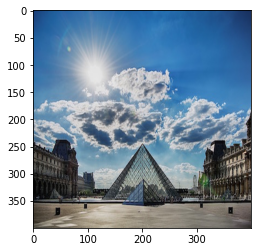

In [55]:
content_image = np.array(Image.open("images/louvre_small.jpg").resize((img_size, img_size)))
content_image = tf.constant(np.reshape(content_image, ((1,) + content_image.shape)))

print(content_image.shape)
imshow(content_image[0])
plt.show()

<a name='5-2'></a>
### 5.2 Load the Style Image
Now load, reshape and normalize your "style" image (Claude Monet's painting):

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
Ahora cargue, modifique y normalice su imagen de "estilo" (el cuadro de Claude Monet):

(1, 400, 400, 3)


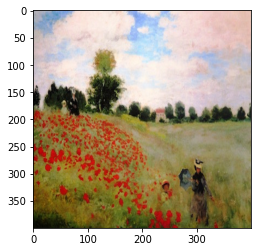

In [56]:
style_image =  np.array(Image.open("images/monet.jpg").resize((img_size, img_size)))
style_image = tf.constant(np.reshape(style_image, ((1,) + style_image.shape)))

print(style_image.shape)
imshow(style_image[0])
plt.show()

<a name='5-3'></a>
### 5.3 Randomly Initialize the Image to be Generated
Now, you get to initialize the "generated" image as a noisy image created from the content_image.

* The generated image is slightly correlated with the content image.
* By initializing the pixels of the generated image to be mostly noise but slightly correlated with the content image, this will help the content of the "generated" image more rapidly match the content of the "content" image. 

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


Ahora, se consigue inicializar la imagen "generada" como una imagen con ruido creada a partir de la imagen_contenido.

* La imagen generada está ligeramente correlacionada con la imagen de contenido.
* Al inicializar los píxeles de la imagen generada para que sean mayoritariamente ruido pero estén ligeramente correlacionados con la imagen de contenido, esto ayudará a que el contenido de la imagen "generada" coincida más rápidamente con el contenido de la imagen de "contenido". 

(1, 400, 400, 3)


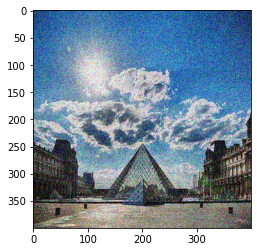

In [57]:
generated_image = tf.Variable(tf.image.convert_image_dtype(content_image, tf.float32))
noise = tf.random.uniform(tf.shape(generated_image), -0.25, 0.25)
generated_image = tf.add(generated_image, noise)
generated_image = tf.clip_by_value(generated_image, clip_value_min=0.0, clip_value_max=1.0)

print(generated_image.shape)
imshow(generated_image.numpy()[0])
plt.show()

<a name='5-4'></a>
## 5.4 - Load Pre-trained VGG19 Model
Next, as explained in [part(2)](#part(2)), define a function which loads the VGG19 model and returns a list of the outputs for the middle layers.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

A continuación, como se explica en [part(2)](#part(2)), defina una función que cargue el modelo VGG19 y devuelva una lista de las salidas de las capas medias

In [58]:
def get_layer_outputs(vgg, layer_names):
    """ Creates a vgg model that returns a list of intermediate output values."""
    outputs = [vgg.get_layer(layer[0]).output for layer in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model

Now, define the content layer and build the model.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Ahora, define la capa de contenido y construye el modelo.

In [59]:
content_layer = [('block5_conv4', 1)]

vgg_model_outputs = get_layer_outputs(vgg, STYLE_LAYERS + content_layer)

Save the outputs for the content and style layers in separate variables.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Guarde las salidas de las capas de contenido y estilo en variables separadas.

In [60]:
content_target = vgg_model_outputs(content_image)  # Content encoder
style_targets = vgg_model_outputs(style_image)     # Style enconder

<a name='5-5'></a>
### 5.5 - Compute Total Cost

<a name='5-5-1'></a>
#### 5.5.1 - Compute the Content image Encoding (a_C)

You've built the model, and now to compute the content cost, you will encode your content image using the appropriate hidden layer activations. Set this encoding to the variable `a_C`. Later in the assignment, you will need to do the proper with the generated image, by setting the variable `a_G` to be the appropriate hidden layer activations. You will use layer `block5_conv4` to compute the encoding. The code below does the following:

1. Set a_C to be the tensor giving the hidden layer activation for layer "block5_conv4" using the content image.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

has construido el modelo, y ahora para calcular el coste del contenido, codificarás tu imagen de contenido utilizando las activaciones de la capa oculta adecuadas. Establece esta codificación en la variable `a_C`. Más adelante en la tarea, tendrás que hacer lo propio con la imagen generada, estableciendo la variable `a_G` para que sean las activaciones de la capa oculta apropiadas. Utilizarás la capa `block5_conv4` para calcular la codificación. El código siguiente hace lo siguiente:

1. Establecer a_C para ser el tensor que da la activación de la capa oculta para la capa "block5_conv4" utilizando la imagen de contenido.

In [61]:
# Assign the content image to be the input of the VGG model.  
# Set a_C to be the hidden layer activation from the layer we have selected
preprocessed_content =  tf.Variable(tf.image.convert_image_dtype(content_image, tf.float32))
a_C = vgg_model_outputs(preprocessed_content)

<a name='5-5-2'></a>
#### 5.5.2 - Compute the Style image Encoding (a_S) 

The code below sets a_S to be the tensor giving the hidden layer activation for `STYLE_LAYERS` using our style image.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

El código siguiente establece que a_S es el tensor que da la activación de la capa oculta para `STYLE_LAYERS` usando nuestra imagen de estilo.

In [62]:
# Assign the input of the model to be the "style" image 
preprocessed_style =  tf.Variable(tf.image.convert_image_dtype(style_image, tf.float32))
a_S = vgg_model_outputs(preprocessed_style)

Below are the utils that you will need to display the images generated by the style transfer model.

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
A continuación se muestran las utilidades que necesitarás para visualizar las imágenes generadas por el modelo de transferencia de estilos.


In [63]:
def clip_0_1(image):
    """
    Truncate all the pixels in the tensor to be between 0 and 1
    
    Arguments:
    image -- Tensor
    J_style -- style cost coded above

    Returns:
    Tensor
    """
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def tensor_to_image(tensor):
    """
    Converts the given tensor into a PIL image
    
    Arguments:
    tensor -- Tensor
    
    Returns:
    Image: A PIL image
    """
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

<a name='ex-6'></a>
### Exercise 6 - train_step 

Implement the train_step() function for transfer learning

* Use the Adam optimizer to minimize the total cost `J`.
* Use a learning rate of 0.01  
* [Adam Optimizer documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
* You will use [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) to update the image. ([Course 2 Week 3: TensorFlow Introduction Assignment](https://www.coursera.org/learn/deep-neural-network/programming/fuJJY/tensorflow-introduction))
* Within the tf.GradientTape():
   * Compute the encoding of the generated image using vgg_model_outputs. Assing the result to a_G.
   * Compute the total cost J, using the global variables a_C, a_S and the local a_G
   * Use `alpha = 10` and `beta = 40`.
   
<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>

Implementar la función train_step() para el aprendizaje por transferencia

* Utilizar el optimizador Adam para minimizar el coste total `J`.
* Utilizar una tasa de aprendizaje de 0,01  
* [Documentación del optimizador Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
* Utilizarás [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) para actualizar la imagen. ([Curso 2 Semana 3: TensorFlow Introducción Asignación](https://www.coursera.org/learn/deep-neural-network/programming/fuJJY/tensorflow-introduction))
* Dentro del tf.GradientTape():
   * Calcular la codificación de la imagen generada usando vgg_model_outputs. Asignar el resultado a a_G.
   * Calcular el coste total J, usando las variables globales a_C, a_S y la local a_G
   * Usar `alpha = 10` y `beta = 40`.
   
<details><summary><font size="1" color="green"><b>codigo</b></font></summary>

```python
a_G = vgg_model_outputs(generated_image)
        
# Compute the style cost
#(1 line)
J_style = compute_style_cost(a_S,a_G)

#(2 lines)
# Compute the content cost
J_content = compute_content_cost(a_C,a_G)
# Compute the total cost
J = total_cost(J_content, J_style, alpha=10, beta=40) 
```


In [64]:
# UNQ_C5
# GRADED FUNCTION: train_step

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

@tf.function()
def train_step(generated_image):
    with tf.GradientTape() as tape:
        # In this function you must use the precomputed encoded images a_S and a_C
        # Compute a_G as the vgg_model_outputs for the current generated image
        
        ### START CODE HERE
        
        #(1 line)
        a_G = None
        
        # Compute the style cost
        #(1 line)
        J_style = None

        #(2 lines)
        # Compute the content cost
        J_content = None
        # Compute the total cost
        J = None
        
        ### END CODE HERE
        
    grad = tape.gradient(J, generated_image)

    optimizer.apply_gradients([(grad, generated_image)])
    generated_image.assign(clip_0_1(generated_image))
    # For grading purposes
    return J

In [65]:
# You always must run the last cell before this one. You will get an error if not.
generated_image = tf.Variable(generated_image)


J1 = train_step(generated_image)
print(J1)
assert type(J1) == EagerTensor, f"Wrong type {type(J1)} != {EagerTensor}"
assert np.isclose(J1, 25629.055, rtol=0.05), f"Unexpected cost for epoch 0: {J1} != {25629.055}"

J2 = train_step(generated_image)
print(J2)
assert np.isclose(J2, 17812.627, rtol=0.05), f"Unexpected cost for epoch 1: {J2} != {17735.512}"

print("\033[92mAll tests passed")

tf.Tensor(25629.055, shape=(), dtype=float32)
tf.Tensor(17735.514, shape=(), dtype=float32)
All tests passed


**Expected output**
```
tf.Tensor(25629.055, shape=(), dtype=float32)
tf.Tensor(17735.512, shape=(), dtype=float32)
```

Looks like it's working! Now you'll get to put it all together into one function to better see your results!

<a name='5-6'></a>
### 5.6 - Train the Model

Run the following cell to generate an artistic image. It should take about 3min on a GPU for 2500 iterations. Neural Style Transfer is generally trained using GPUs.

If you increase the learning rate you can speed up the style transfer, but often at the cost of quality.

Epoch 0 


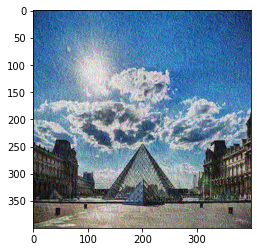

Epoch 250 


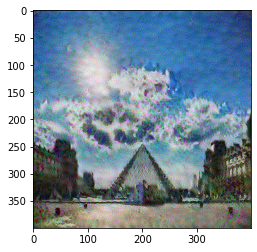

Epoch 500 


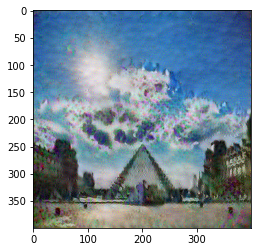

Epoch 750 


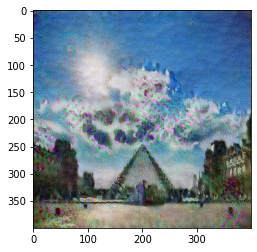

Epoch 1000 


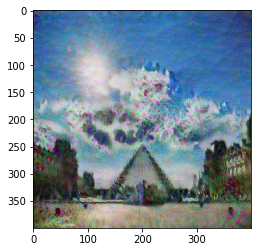

Epoch 1250 


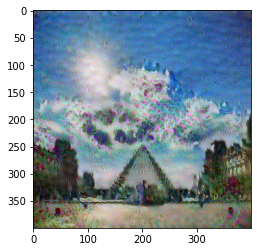

Epoch 1500 


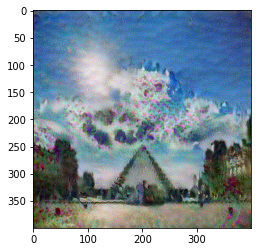

Epoch 1750 


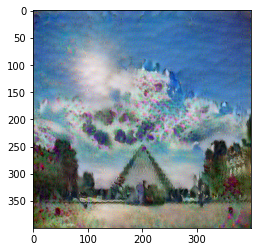

Epoch 2000 


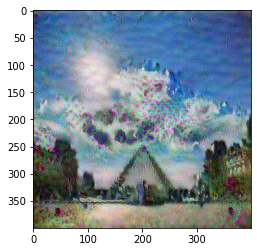

Epoch 2250 


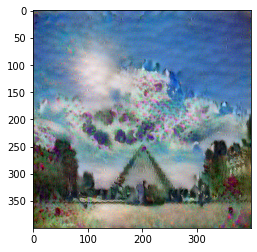

Epoch 2500 


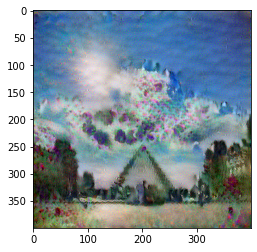

In [66]:
# Show the generated image at some epochs
# Uncoment to reset the style transfer process. You will need to compile the train_step function again 
epochs = 2501
for i in range(epochs):
    train_step(generated_image)
    if i % 250 == 0:
        print(f"Epoch {i} ")
    if i % 250 == 0:
        image = tensor_to_image(generated_image)
        imshow(image)
        image.save(f"output/image_{i}.jpg")
        plt.show() 

Now, run the following code cell to see the results!

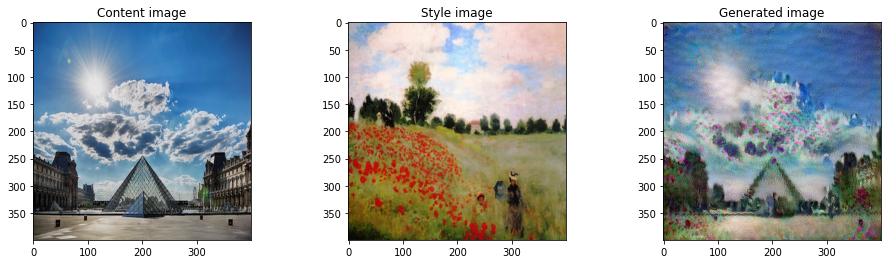

In [67]:
# Show the 3 images in a row
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
imshow(content_image[0])
ax.title.set_text('Content image')
ax = fig.add_subplot(1, 3, 2)
imshow(style_image[0])
ax.title.set_text('Style image')
ax = fig.add_subplot(1, 3, 3)
imshow(generated_image[0])
ax.title.set_text('Generated image')
plt.show()

Look at that! You did it! After running this, in the upper bar of the notebook click on "File" and then "Open". Go to the "/output" directory to see all the saved images. Open "generated_image" to see the generated image! :)

Running for around 20000 epochs with a learning rate of 0.001, you should see something like the image presented below on the right:

<img src="images/louvre_generated.png" style="width:800px;height:300px;">

The hyperparameters were set so that you didn't have to wait too long to see an initial result. To get the best looking results, you may want to try running the optimization algorithm longer (and perhaps with a smaller learning rate). After completing and submitting this assignment, come back and play more with this notebook, and see if you can generate even better looking images. But first, give yourself a pat on the back for finishing this long assignment!

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


¡Mira eso! ¡Lo has conseguido! Después de ejecutar esto, en la barra superior del cuaderno haz clic en "Archivo" y luego en "Abrir". Ve al directorio "/output" para ver todas las imágenes guardadas. ¡Abre "generated_image" para ver la imagen generada! :)

Si se ejecuta durante unas 20000 épocas con una tasa de aprendizaje de 0,001, debería ver algo como la imagen que se presenta a continuación a la derecha:

<img src="images/louvre_generated.png" style="width:800px;height:300px;">

Los hiperparámetros se establecieron para que no tuviera que esperar demasiado tiempo para ver un resultado inicial. Para obtener los mejores resultados, puede intentar ejecutar el algoritmo de optimización durante más tiempo (y quizás con una tasa de aprendizaje menor). Después de completar y enviar esta tarea, vuelve y juega más con este cuaderno, y mira si puedes generar imágenes aún más bonitas. Pero antes, ¡date una palmadita en la espalda por haber terminado esta larga tarea!

Here are few other examples:

- The beautiful ruins of the ancient city of Persepolis (Iran) with the style of Van Gogh (The Starry Night)
<img src="images/perspolis_vangogh.png" style="width:750px;height:300px;">

- The tomb of Cyrus the great in Pasargadae with the style of a Ceramic Kashi from Ispahan.
<img src="images/pasargad_kashi.png" style="width:750px;height:300px;">

- A scientific study of a turbulent fluid with the style of a abstract blue fluid painting.
<img src="images/circle_abstract.png" style="width:750px;height:300px;">

<a name='6'></a>
## 6 - Test With Your Own Image (Optional/Ungraded)

Finally, you can also rerun the algorithm on your own images! 

To do so, go back to part(4) and change the content image and style image with your own pictures. In detail, here's what you should do:

1. Click on "File -> Open" in the upper tab of the notebook
2. Go to "/images" and upload your images (images will scaled to 400x400, but you can change that parameter too in section 2), rename them "my_content.png" and "my_style.png" for example.
3. Change the code in [part(4)](#part(4)) from :

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


Por último, ¡también puedes volver a ejecutar el algoritmo con tus propias imágenes! 

Para ello, vuelve a la parte(4) y cambia la imagen de contenido y la imagen de estilo por tus propias imágenes. En detalle, esto es lo que debes hacer:

1. Haga clic en "Archivo -> Abrir" en la pestaña superior del cuaderno
2. Ve a "/imágenes" y sube tus imágenes (las imágenes se escalarán a 400x400, pero puedes cambiar ese parámetro también en la sección 2), renómbralas "mi_contenido.png" y "mi_estilo.png" por ejemplo.
3. Cambia el código en [part(4)](#part(4)) de :

</details>
    
```py
content_image = np.array(Image.open("images/louvre_small.jpg").resize((img_size, img_size)))
style_image =  np.array(Image.open("images/monet.jpg").resize((img_size, img_size)))

```

&emsp;&emsp;to:

``` py
content_image = np.array(Image.open("images/my_content.jpg").resize((img_size, img_size)))
style_image =  np.array(Image.open("my_style.jpg").resize((img_size, img_size)))

```
4. Rerun the cells (you may need to restart the Kernel in the upper tab of the notebook).

You can share your generated images with us on social media with the hashtag #deeplearningAI or by tagging us directly!

Here are some ideas on how to tune your hyperparameters: 
- To select different layers to represent the style, redefine `STYLE_LAYERS`
- To alter the number of iterations you want to run the algorithm, try changing `epochs` given in Section 5.6.
- To alter the relative weight of content versus style, try altering alpha and beta values

Happy coding!

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>


4. Vuelve a ejecutar las celdas (puede que tengas que reiniciar el Kernel en la pestaña superior del cuaderno).

¡Puedes compartir tus imágenes generadas con nosotros en las redes sociales con el hashtag #deeplearningAI o etiquetándonos directamente!

Aquí tienes algunas ideas sobre cómo afinar tus hiperparámetros: 
- Para seleccionar diferentes capas para representar el estilo, redefine `STYLE_LAYERS`.
- Para alterar el número de iteraciones que desea ejecutar el algoritmo, pruebe a cambiar los "epocs" indicados en la sección 5.6.
- Para alterar el peso relativo del contenido frente al estilo, pruebe a modificar los valores alfa y beta

¡Feliz codificación!

### Conclusion

Great job on completing this assignment! You are now able to use Neural Style Transfer to generate artistic images. This is also your first time building a model in which the optimization algorithm updates the pixel values rather than the neural network's parameters. Deep learning has many different types of models and this is only one of them! 

<font color = 'blue'>
    
## What you should remember
- Neural Style Transfer is an algorithm that given a content image C and a style image S can generate an artistic image
- It uses representations (hidden layer activations) based on a pretrained ConvNet. 
- The content cost function is computed using one hidden layer's activations.
- The style cost function for one layer is computed using the Gram matrix of that layer's activations. The overall style cost function is obtained using several hidden layers.
- Optimizing the total cost function results in synthesizing new images. 
    

<details><summary><font size="2" color="green"><b>Traduccion en español</b></font></summary>
    
    
¡Gran trabajo al completar esta tarea! Ahora es capaz de utilizar la Transferencia de Estilo Neural para generar imágenes artísticas. También es la primera vez que construyes un modelo en el que el algoritmo de optimización actualiza los valores de los píxeles en lugar de los parámetros de la red neuronal. ¡El aprendizaje profundo tiene muchos tipos de modelos diferentes y éste es sólo uno de ellos! 

<font color = 'blue'>
    
## Lo que debes recordar
- La transferencia de estilo neuronal es un algoritmo que dada una imagen de contenido C y una imagen de estilo S puede generar una imagen artística
- Utiliza representaciones (activaciones de la capa oculta) basadas en una ConvNet preentrenada. 
- La función de coste del contenido se calcula utilizando las activaciones de una capa oculta.
- La función de coste de estilo para una capa se calcula utilizando la matriz Gram de las activaciones de esa capa. La función de coste de estilo total se obtiene utilizando varias capas ocultas.
- La optimización de la función de coste total permite sintetizar nuevas imágenes. 




# Congratulations on finishing the course!
This was the final programming exercise of this course. Congratulations - you've finished all the programming exercises of this course on Convolutional Networks! See you in Course 5, Sequence Models! 


<a name='7'></a>
## 7 - References

The Neural Style Transfer algorithm was due to Gatys et al. (2015). Harish Narayanan and Github user "log0" also have highly readable write-ups this lab was inspired by. The pre-trained network used in this implementation is a VGG network, which is due to Simonyan and Zisserman (2015). Pre-trained weights were from the work of the MathConvNet team. 

- Leon A. Gatys, Alexander S. Ecker, Matthias Bethge, (2015). [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576) 
- Harish Narayanan, [Convolutional neural networks for artistic style transfer.](https://harishnarayanan.org/writing/artistic-style-transfer/)
- Log0, [TensorFlow Implementation of "A Neural Algorithm of Artistic Style".](http://www.chioka.in/tensorflow-implementation-neural-algorithm-of-artistic-style)
- Karen Simonyan and Andrew Zisserman (2015). [Very deep convolutional networks for large-scale image recognition](https://arxiv.org/pdf/1409.1556.pdf)
- [MatConvNet.](http://www.vlfeat.org/matconvnet/pretrained/)
